In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [72]:
df_house_price = pd.read_csv("house_price.csv")

In [3]:
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
numerical_var = df_house_price.dtypes[df_house_price.dtypes != "object"].index

In [5]:
len(numerical_var)

38

In [6]:
categorical_var = df_house_price.dtypes[df_house_price.dtypes == "object"].index
len(categorical_var)

43

In [7]:
data_num = df_house_price[numerical_var]

In [8]:
data_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [9]:
corr_matrix = data_num.corr()

In [10]:
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [11]:
filter_corr = corr_matrix[corr_matrix > 0.5]
filter_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897
YearRemodAdd,NaN,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


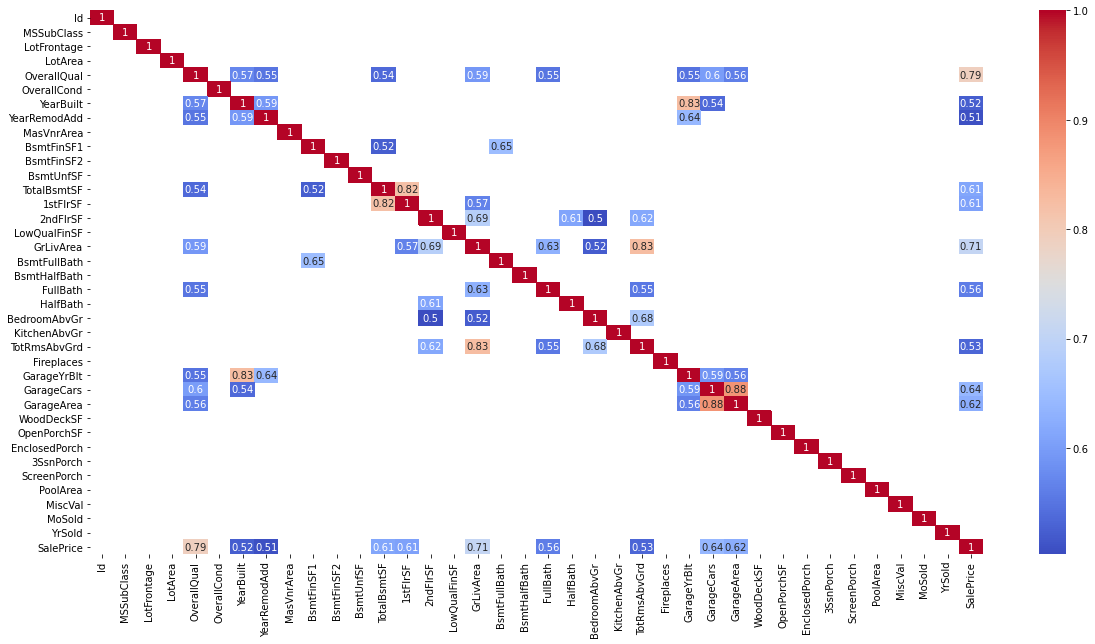

In [16]:
plt.figure(figsize= (20,10))
sns.heatmap(filter_corr,cmap = "coolwarm", annot =True);

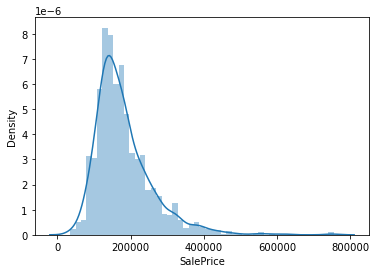

In [17]:
#sns.distplot(df_house_price["SalePrice"]);
sns.distplot(df_house_price.SalePrice) ;

In [18]:
data = pd.concat([df_house_price["SalePrice"],df_house_price["OverallQual"]], axis = 1)
data.head()

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


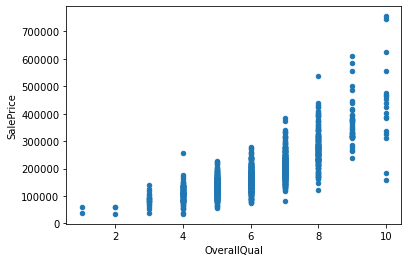

In [20]:
data.plot.scatter(x="OverallQual", y="SalePrice");

In [26]:
df_house_price.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [111]:
pd.options.display.max_rows= 100
pd.options.display.max_columns= 50

In [53]:
MV = df_house_price.isnull().sum()
MV.value_counts()

0      67
81      5
37      3
38      2
8       2
259     1
1       1
dtype: int64

In [33]:
df_house_price.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

In [40]:
df_house_price.isnull().count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
Street           1460
Alley            1460
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1460
MasVnrArea       1460
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1460
BsmtCond         1460
BsmtExposure     1460
BsmtFinType1     1460
BsmtFinSF1       1460
BsmtFinType2     1460
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1460
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

In [73]:
# PCA
# missing value
total_missing_value = df_house_price.isnull().sum().sort_values(ascending = False)
percent_of_missing_value = (df_house_price.isnull().sum()/df_house_price.isnull().count()).sort_values(ascending= False)
missing_data = pd.concat([total_missing_value,percent_of_missing_value], axis = 1, keys = ["Total","Percent"])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [105]:
missing_data[missing_data["Total"]>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [108]:
missing_data[missing_data["Total"]>0].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [113]:
df_house_price[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   MiscFeature   54 non-null     object 
 2   Alley         91 non-null     object 
 3   Fence         281 non-null    object 
 4   FireplaceQu   770 non-null    object 
 5   LotFrontage   1201 non-null   float64
 6   GarageCond    1379 non-null   object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
 10  GarageQual    1379 non-null   object 
 11  BsmtExposure  1422 non-null   object 
 12  BsmtFinType2  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtCond      1423 non-null   object 
 15  BsmtQual      1423 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  MasVnrType    1452 non-null   object 
 18  Electrical    1459 non-null 

In [115]:
# Imputing missing value for object dtypes
df_house_price["PoolQC"] = df_house_price["PoolQC"].fillna("None")
df_house_price["MiscFeature"] = df_house_price["MiscFeature"].fillna("None")
df_house_price["Alley"] = df_house_price["Alley"].fillna("None")
df_house_price["Fence"] = df_house_price["Fence"].fillna("None")
df_house_price["FireplaceQu"] = df_house_price["FireplaceQu"].fillna("None")

In [49]:
df_house_price["PoolQC"].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [51]:
df_house_price["MiscFeature"].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [52]:
df_house_price["Alley"].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [116]:
df_house_price["FireplaceQu"].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [117]:
df_house_price["LotFrontage"] = df_house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x : x.fillna(x.median()))

In [118]:
for i in ("GarageCond","GarageType","GarageFinish","GarageQual"):
    df_house_price[i] = df_house_price[i].fillna("None")

In [119]:
df_house_price["GarageYrBlt"] = df_house_price["GarageYrBlt"].fillna(0)

In [120]:
for i in ("BsmtFinType2","BsmtExposure","BsmtQual","BsmtFinType1","BsmtCond","MasVnrType","Electrical"):
    df_house_price[i] = df_house_price[i].fillna("None")

In [62]:
df_house_price["MasVnrArea"].mean()

103.68526170798899

In [60]:
df_house_price["MasVnrArea"].mode()[0]

0.0

In [121]:
df_house_price["MasVnrArea"] = df_house_price["MasVnrArea"].fillna(df_house_price["MasVnrArea"].mode()[0])


In [123]:
df_house_price.isnull().sum().sort_values(ascending=False)

SalePrice        0
Heating          0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
Utilities        0
OverallQual      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
CentralAir       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [128]:
num_var = df_house_price.dtypes[df_house_price.dtypes != "object"]
num_var

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
SalePrice          int64
dtype: object

In [130]:
df_house_price[["YearBuilt","YearRemodAdd", "GarageYrBlt"]]

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003.0
1,1976,1976,1976.0
2,2001,2002,2001.0
3,1915,1970,1998.0
4,2000,2000,2000.0
...,...,...,...
1455,1999,2000,1999.0
1456,1978,1988,1978.0
1457,1941,2006,1941.0
1458,1950,1996,1950.0


In [125]:
df_house_price["OverallCond"] = df_house_price["OverallCond"].astype(str)
df_house_price["OverallQual"] = df_house_price["OverallQual"].astype(str)

In [133]:
df_house_price["MoSold"] = df_house_price["MoSold"].astype(str)
df_house_price["YrSold"] = df_house_price["YrSold"].astype(str)
df_house_price["YearBuilt"] = df_house_price["YearBuilt"].astype(str)
df_house_price["YearRemodAdd"] = df_house_price["YearRemodAdd"].astype(str)
df_house_price["GarageYrBlt"] = df_house_price["GarageYrBlt"].astype(str)

In [134]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [137]:
categorical_var2 = df_house_price.dtypes[df_house_price.dtypes =="object"].index
categorical_var2

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [136]:
#categorical_var
from sklearn.preprocessing import LabelEncoder

In [138]:
for c in categorical_var2 :
    label_ec = LabelEncoder()
    label_ec.fit(list(df_house_price[c].values))
    df_house_price[c] = label_ec.transform(list(df_house_price[c].values))

In [139]:
# Droping sales price
X = df_house_price.drop("SalePrice", axis = 1)

In [140]:
X = X.drop("Id", axis = 1)

In [141]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,4,104,53,1,1,12,13,1,...,6,0,3,1,90,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,4,2,8,4
1,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,7,77,26,1,1,8,8,2,...,6,1,5,1,63,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,7,1,8,4
2,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,4,102,52,1,1,12,13,1,...,6,1,5,1,88,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,11,2,8,4
3,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,4,19,20,1,1,13,15,2,...,6,1,2,5,85,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,4,0,8,0
4,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,4,101,50,1,1,12,13,1,...,6,1,5,1,87,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,3,2,8,4


In [143]:
X.shape

(1460, 79)

In [142]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
X_std

array([[ 0.07337496, -0.04553194, -0.23187687, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.43704276, ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [ 0.07337496, -0.04553194, -0.09809294, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       ...,
       [ 0.30985939, -0.04553194, -0.18728222, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194, -0.09809294, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.21406955, ...,  0.13877749,
         0.31386709,  0.2085023 ]])

In [144]:
from sklearn.decomposition import PCA as sklearnPCA

In [145]:
sklearn_pca = sklearnPCA(n_components = 79)

In [146]:
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [147]:
sklearn_pca.explained_variance_ratio_
#this is a combined variance with other PCAs and it is the ratio of each eigen value to total eigen value
#eigen value = unique and common variance

array([1.31913134e-01, 5.18149223e-02, 4.86388127e-02, 3.86106581e-02,
       3.14570390e-02, 2.76367702e-02, 2.45643709e-02, 2.29255529e-02,
       2.14451209e-02, 1.99895962e-02, 1.98725436e-02, 1.86829248e-02,
       1.81629424e-02, 1.70944316e-02, 1.69577492e-02, 1.63566317e-02,
       1.57737922e-02, 1.52198166e-02, 1.47468953e-02, 1.44903668e-02,
       1.43390920e-02, 1.37571611e-02, 1.35381988e-02, 1.31872875e-02,
       1.29481249e-02, 1.28527863e-02, 1.25103266e-02, 1.21386179e-02,
       1.18653329e-02, 1.17299068e-02, 1.14603111e-02, 1.10458950e-02,
       1.08545237e-02, 1.06081712e-02, 1.02704673e-02, 1.00884372e-02,
       9.92149666e-03, 9.58125248e-03, 9.52886891e-03, 9.38509220e-03,
       8.89260731e-03, 8.51402390e-03, 8.29325746e-03, 8.24292386e-03,
       7.86151956e-03, 7.73707478e-03, 7.61913236e-03, 7.37617354e-03,
       6.91210689e-03, 6.85930353e-03, 6.74620862e-03, 6.66362668e-03,
       6.38507525e-03, 5.95987581e-03, 5.66054555e-03, 5.52333670e-03,
      

In [148]:
print(sklearn_pca.singular_values_) # unique variance

[1.23348534e+02 7.73067471e+01 7.48999376e+01 6.67334496e+01
 6.02349972e+01 5.64590566e+01 5.32283246e+01 5.14221088e+01
 4.97340954e+01 4.80166641e+01 4.78758726e+01 4.64207771e+01
 4.57702280e+01 4.44035104e+01 4.42256350e+01 4.34347085e+01
 4.26538298e+01 4.18981341e+01 4.12420527e+01 4.08817674e+01
 4.06678112e+01 3.98340427e+01 3.95157671e+01 3.90002788e+01
 3.86450091e+01 3.85024723e+01 3.79860641e+01 3.74174850e+01
 3.69938846e+01 3.67821621e+01 3.63570115e+01 3.56936062e+01
 3.53830576e+01 3.49792291e+01 3.44179560e+01 3.41115868e+01
 3.38281750e+01 3.32430694e+01 3.31520699e+01 3.29010111e+01
 3.20261351e+01 3.13369992e+01 3.09280506e+01 3.08340532e+01
 3.01122511e+01 2.98729678e+01 2.96444046e+01 2.91679251e+01
 2.82354814e+01 2.81274256e+01 2.78945819e+01 2.77233241e+01
 2.71376967e+01 2.62185445e+01 2.55516599e+01 2.52400803e+01
 2.50699921e+01 2.43003250e+01 2.39474651e+01 2.36166966e+01
 2.32962396e+01 2.30874401e+01 2.16980109e+01 2.14246432e+01
 2.12401274e+01 2.080313

In [149]:
np.cumsum(sklearn_pca.explained_variance_ratio_)

array([0.13191313, 0.18372806, 0.23236687, 0.27097753, 0.30243457,
       0.33007134, 0.35463571, 0.37756126, 0.39900638, 0.41899598,
       0.43886852, 0.45755145, 0.47571439, 0.49280882, 0.50976657,
       0.5261232 , 0.54189699, 0.55711681, 0.5718637 , 0.58635407,
       0.60069316, 0.61445032, 0.62798852, 0.64117581, 0.65412394,
       0.66697672, 0.67948705, 0.69162567, 0.703491  , 0.71522091,
       0.72668122, 0.73772711, 0.74858164, 0.75918981, 0.76946027,
       0.77954871, 0.78947021, 0.79905146, 0.80858033, 0.81796542,
       0.82685803, 0.83537205, 0.84366531, 0.85190823, 0.85976975,
       0.86750683, 0.87512596, 0.88250213, 0.88941424, 0.89627355,
       0.90301975, 0.90968338, 0.91606846, 0.92202833, 0.92768888,
       0.93321221, 0.93866136, 0.94378106, 0.94875315, 0.95358884,
       0.95829418, 0.96291556, 0.96699744, 0.97097711, 0.97488853,
       0.97864066, 0.98196032, 0.9849933 , 0.98776116, 0.98993575,
       0.99200779, 0.99372205, 0.99527357, 0.99663703, 0.99785

In [151]:
sklearn_pca2 = sklearnPCA(n_components = 50)# first 50 PCA has covered the 90% of variance
Y_sklearn2 = sklearn_pca2.fit_transform(X_std)

In [152]:
np.cumsum(sklearn_pca2.explained_variance_ratio_)

array([0.13191313, 0.18372806, 0.23236687, 0.27097753, 0.30243457,
       0.33007133, 0.35463569, 0.37756124, 0.39900633, 0.41899592,
       0.43886846, 0.45755137, 0.47571428, 0.49280867, 0.50976628,
       0.5261226 , 0.54189611, 0.5571158 , 0.57186248, 0.58635226,
       0.60069128, 0.61444759, 0.6279853 , 0.64117223, 0.65412   ,
       0.66697189, 0.67948067, 0.69161797, 0.70348302, 0.71521212,
       0.72667044, 0.73770859, 0.74856177, 0.75916888, 0.76943104,
       0.77951671, 0.78943338, 0.79901183, 0.80853518, 0.81791848,
       0.82680647, 0.83531478, 0.84358748, 0.85179882, 0.85963721,
       0.86731819, 0.87493042, 0.88229375, 0.88920398, 0.89599052])